## Phone theft prediction

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

In [5]:
df = pd.read_csv('X_train.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    95000 non-null  int64 
 1   City                  95000 non-null  object
 2   TimeOfDay             95000 non-null  object
 3   DayOfWeek             95000 non-null  object
 4   IsWeekend             95000 non-null  int64 
 5   Weather               95000 non-null  object
 6   PhoneBrandPopularity  95000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.1+ MB


In [7]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values of {column}: {unique_values}")
  


Unique values of id: [26183 30456 53878 ... 49595 46912 91412]
Unique values of City: ['Ben Aknoun' 'El Koba' 'Bab Ezzouar' 'Bab El Oued' 'Oued El Smar'
 'El Harrach']
Unique values of TimeOfDay: ['Night' 'Morning' 'Evening' 'Afternoon']
Unique values of DayOfWeek: ['Thursday' 'Friday' 'Monday' 'Wednesday' 'Saturday' 'Tuesday' 'Sunday']
Unique values of IsWeekend: [0 1]
Unique values of Weather: ['Cloudy' 'Sunny' 'Rainy' 'Stormy']
Unique values of PhoneBrandPopularity: ['Low' 'Medium' 'High']


In [8]:
df.isnull().sum()

id                      0
City                    0
TimeOfDay               0
DayOfWeek               0
IsWeekend               0
Weather                 0
PhoneBrandPopularity    0
dtype: int64

In [9]:
df.duplicated().sum()


0

In [10]:
# Check if the day of the week is Saturday (6) or Friday (5)
df['IsWeekend'] = (df['DayOfWeek'] == 'Friday') | (df['DayOfWeek'] == 'Saturday')

# Convert boolean values to integers (True=1, False=0)
df['IsWeekend'] = df['IsWeekend'].astype(int)

# Print the updated DataFrame
df.head()

,id,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity
0,26183,Ben Aknoun,Night,Thursday,0,Cloudy,Low
1,30456,El Koba,Night,Friday,1,Sunny,Medium
2,53878,Bab Ezzouar,Morning,Thursday,0,Rainy,Low
3,52053,Bab El Oued,Evening,Friday,1,Stormy,Medium
4,34510,Oued El Smar,Afternoon,Thursday,0,Cloudy,Low


In [14]:
def most_common_values(df):
    common_values = {}
    for column in df.columns:
        if column not in ['id', 'IsWeekend']:
            common_values[column] = df[column].mode()[0]
    return common_values

most_common = most_common_values(df)
print("Most common thefts happened in:")
for key, value in most_common.items():
    print(f"{key}: {value}")

Most common thefts happened in:
City: El Harrach
TimeOfDay: Morning
DayOfWeek: Tuesday
Weather: Sunny
PhoneBrandPopularity: High


In [2045]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print encoded DataFrame
print(df)

          id  City  TimeOfDay  DayOfWeek  IsWeekend  Weather  \
0      26183     2          3          4          0        0   
1      30456     4          3          0          1        3   
2      53878     1          2          4          0        1   
3      52053     0          1          0          1        2   
4      34510     5          0          4          0        0   
...      ...   ...        ...        ...        ...      ...   
94995  56346     4          2          5          0        0   
94996  90970     2          0          4          0        2   
94997  49595     0          2          0          1        2   
94998  46912     4          1          6          0        3   
94999  91412     1          1          4          0        0   

       PhoneBrandPopularity  
0                         1  
1                         2  
2                         1  
3                         2  
4                         1  
...                     ...  
94995                

In [2046]:
for column in df.columns:
   unique_values = df[column].unique()
   print(f"Unique values of {column}: {unique_values}")
df.head()

Unique values of id: [26183 30456 53878 ... 49595 46912 91412]
Unique values of City: [2 4 1 0 5 3]
Unique values of TimeOfDay: [3 2 1 0]
Unique values of DayOfWeek: [4 0 1 6 2 5 3]
Unique values of IsWeekend: [0 1]
Unique values of Weather: [0 3 1 2]
Unique values of PhoneBrandPopularity: [1 2 0]


,id,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity
0,26183,2,3,4,0,0,1
1,30456,4,3,0,1,3,2
2,53878,1,2,4,0,1,1
3,52053,0,1,0,1,2,2
4,34510,5,0,4,0,0,1


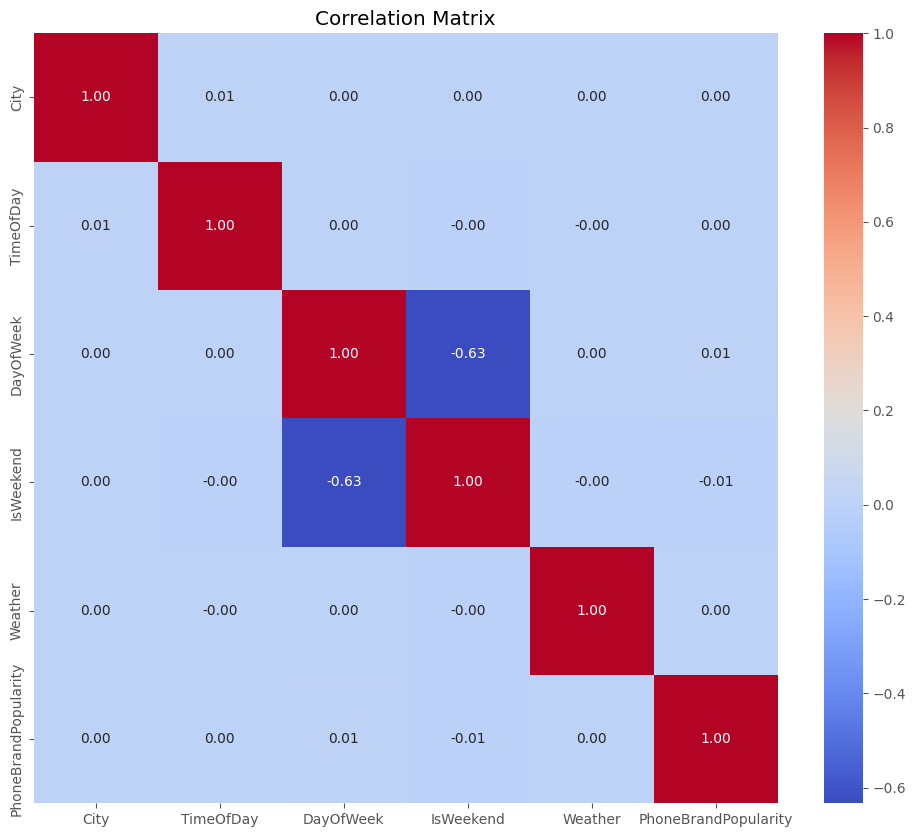

In [2047]:
# Visualize the correlation matrix using a heatmap
data3 = df.drop(['id'],axis=1)
correlation_matrix = data3.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# ML

In [2048]:
y_train = pd.read_csv("y_train.csv")
data = pd.merge(df, y_train, on='id')
data.head()

,id,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity,HighRisk
0,26183,2,3,4,0,0,1,0
1,30456,4,3,0,1,3,2,1
2,53878,1,2,4,0,1,1,1
3,52053,0,1,0,1,2,2,1
4,34510,5,0,4,0,0,1,0


In [2049]:
rows_to_drop = data[data['HighRisk'] == 0].index[:34000]

data = data.drop(rows_to_drop)


In [2050]:
data['HighRisk'].value_counts()


HighRisk
1    30757
0    30243
Name: count, dtype: int64

In [2051]:
X = data.drop([ 'id','HighRisk','IsWeekend'], axis=1)  
y = data['HighRisk'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [2052]:
#features selection
from sklearn.feature_selection import RFE
clf = RandomForestClassifier()
rfe = RFE(estimator=clf, n_features_to_select=5)  # Select top 5 features

rfe.fit(X, y)
selected_indices = rfe.support_

# Get selected feature names
selected_features = X.columns[selected_indices]

# Print selected features
print("Selected Features:", selected_features)

Selected Features: Index(['City', 'TimeOfDay', 'DayOfWeek', 'Weather', 'PhoneBrandPopularity'], dtype='object')


In [2053]:
#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

Accuracy: 0.5033879781420765
              precision    recall  f1-score   support

           0       0.50      0.25      0.33      9073
           1       0.51      0.76      0.61      9227

    accuracy                           0.50     18300
   macro avg       0.50      0.50      0.47     18300
weighted avg       0.50      0.50      0.47     18300



In [2054]:
#random forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=20)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Accuracy: 0.5013114754098361


In [2055]:
#xgboot
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.49901639344262294


# DL

In [2056]:
#deep learning model
# Standardize the features
def swish(x):
    return x * tf.sigmoid(x)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build deep learning model
dl_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation=swish),
    layers.Dense(32, activation=swish),
    layers.Dense(16, activation=swish),
    layers.Dense(1, activation=swish)
])

# Compile the model
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
dl_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = dl_model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

Epoch 1/100
1068/1068 [==============================] - 4s 3ms/step - loss: 0.7459 - accuracy: 0.4996 - val_loss: 0.6976 - val_accuracy: 0.4995
Epoch 2/100
1068/1068 [==============================] - 3s 3ms/step - loss: 0.6971 - accuracy: 0.5035 - val_loss: 0.6970 - val_accuracy: 0.4981
Epoch 3/100
1068/1068 [==============================] - 3s 2ms/step - loss: 0.6961 - accuracy: 0.4992 - val_loss: 0.6958 - val_accuracy: 0.4966
Epoch 4/100
1068/1068 [==============================] - 2s 2ms/step - loss: 0.6950 - accuracy: 0.5085 - val_loss: 0.6943 - val_accuracy: 0.5006
Epoch 5/100
1068/1068 [==============================] - 3s 2ms/step - loss: 0.6947 - accuracy: 0.5076 - val_loss: 0.6951 - val_accuracy: 0.4961
Epoch 6/100
1068/1068 [==============================] - 2s 2ms/step - loss: 0.6945 - accuracy: 0.5018 - val_loss: 0.6950 - val_accuracy: 0.4973
Epoch 7/100
1068/1068 [==============================] - 3s 2ms/step - loss: 0.6941 - accuracy: 0.5046 - val_loss: 0.6954 - val_ac

# Submission

In [2058]:
df_test = pd.read_csv('X_test.csv')
df_test.head(),

(      id          City  TimeOfDay  DayOfWeek  IsWeekend Weather  \
 0  38665       El Koba  Afternoon   Saturday          0   Sunny   
 1  35050   Bab Ezzouar      Night     Friday          0   Rainy   
 2  82586    El Harrach    Morning   Thursday          0  Stormy   
 3  58728    El Harrach    Morning  Wednesday          0   Rainy   
 4   9507  Oued El Smar    Morning     Monday          1  Stormy   
 
   PhoneBrandPopularity  
 0                 High  
 1               Medium  
 2                  Low  
 3                  Low  
 4                  Low  ,)

In [2059]:

for column in df_test.columns:
    unique_values = df_test[column].unique()
    print(f"Unique values of {column}: {unique_values}")


Unique values of id: [38665 35050 82586 ... 68104 83657 74851]
Unique values of City: ['El Koba' 'Bab Ezzouar' 'El Harrach' 'Oued El Smar' 'Bab El Oued'
 'Ben Aknoun']
Unique values of TimeOfDay: ['Afternoon' 'Night' 'Morning' 'Evening']
Unique values of DayOfWeek: ['Saturday' 'Friday' 'Thursday' 'Wednesday' 'Monday' 'Tuesday' 'Sunday']
Unique values of IsWeekend: [0 1]
Unique values of Weather: ['Sunny' 'Rainy' 'Stormy' 'Cloudy']
Unique values of PhoneBrandPopularity: ['High' 'Medium' 'Low']


In [2060]:
# Check if the day of the week is Saturday (6) or Friday (5)
df_test['IsWeekend'] = (df_test['DayOfWeek'] == 'Friday') | (df_test['DayOfWeek'] == 'Saturday')

# Convert boolean values to integers (True=1, False=0)
df_test['IsWeekend'] = df_test['IsWeekend'].astype(int)

# Print the updated DataFrame
df_test.head()

,id,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity
0,38665,El Koba,Afternoon,Saturday,1,Sunny,High
1,35050,Bab Ezzouar,Night,Friday,1,Rainy,Medium
2,82586,El Harrach,Morning,Thursday,0,Stormy,Low
3,58728,El Harrach,Morning,Wednesday,0,Rainy,Low
4,9507,Oued El Smar,Morning,Monday,0,Stormy,Low


In [2061]:
df_test.isnull().sum()

id                      0
City                    0
TimeOfDay               0
DayOfWeek               0
IsWeekend               0
Weather                 0
PhoneBrandPopularity    0
dtype: int64

In [2062]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in df_test.select_dtypes(include=['object']).columns:
   df_test[column] = label_encoder.fit_transform(df_test[column])

# Print encoded DataFrame
df_test.head()

,id,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity
0,38665,4,0,2,1,3,0
1,35050,1,3,0,1,1,2
2,82586,3,2,4,0,2,1
3,58728,3,2,6,0,1,1
4,9507,5,2,1,0,2,1


In [2063]:
df_test.head()

,id,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity
0,38665,4,0,2,1,3,0
1,35050,1,3,0,1,1,2
2,82586,3,2,4,0,2,1
3,58728,3,2,6,0,1,1
4,9507,5,2,1,0,2,1


In [2064]:
df_test.reset_index(drop=True, inplace=True)
X_test=df_test.drop(['id','IsWeekend'], axis=1)
predictions = dl_model.predict(X_test)
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

df_test['HighRisk'] = binary_predictions

df_test.head()

157/157 [==============================] - 0s 3ms/step


,id,City,TimeOfDay,DayOfWeek,IsWeekend,Weather,PhoneBrandPopularity,HighRisk
0,38665,4,0,2,1,3,0,0
1,35050,1,3,0,1,1,2,0
2,82586,3,2,4,0,2,1,0
3,58728,3,2,6,0,1,1,0
4,9507,5,2,1,0,2,1,0


In [2065]:
df_test['HighRisk'].value_counts()

HighRisk
0    4774
1     226
Name: count, dtype: int64

In [2066]:
submission = pd.read_csv("submission.csv")

submission_merged = pd.merge(submission, df_test[['id', 'HighRisk']], on='id', how='left')
submission_merged.head()


,id,HighRisk_x,HighRisk_y
0,38665,0,0
1,35050,1,0
2,82586,0,0
3,58728,0,0
4,9507,0,0


In [2067]:
submission_merged = submission_merged.drop(columns=['HighRisk_x'])
submission_merged.rename(columns={'HighRisk_y': 'HighRisk'}, inplace=True)

In [2068]:
submission_merged.head()

,id,HighRisk
0,38665,0
1,35050,0
2,82586,0
3,58728,0
4,9507,0


In [2069]:
submission_merged.to_csv("submission.csv", index=False)